> # Projet Final : Classification de chiffres manuscrits (MNIST) avec un réseau de neurones (Multi-Layer Perceptron (MLP))
> ## Smain Belghazi, Rayan Guettab ING3


# Introduction
Ce projet implémente un réseau de neurones multicouches (MLP) pour la classification des chiffres manuscrits du dataset MNIST en utilisant Scikit-learn.
L'objectif est d'explorer différentes architectures de MLP, d'optimiser les hyperparamètres et d'évaluer leurs performances.
Plusieurs expérimentations sont réalisées, incluant l'ajout de régularisation L2, la modification de l'architecture du réseau et la comparaison entre différents algorithmes d'optimisation (Adam, SGD).



In [7]:
!pip install scikit-learn numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\smain\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import sys
!{sys.executable} -m pip install seaborn





[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Installation réussie !")


Installation réussie !


---

##  Phase 1 : Classification de fruits avec un arbre de décision

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Nos données de fruits (simplifiées)
attributs = [
    ["Rouge", "Ronde"],
    ["Jaune", "Allongée"],
    ["Orange", "Ronde"],
    ["Vert", "Ronde"],
    ["Jaune", "Ronde"],
    ["Rouge" , "Allongée"]
]
etiquettes = ["Pomme", "Banane", "Orange", "Pomme", "Banane","Poivron Rouge"]  # Les noms des fruits correspondants

# Créer un encodeur pour transformer les valeurs catégorielles en nombres
encodeur_couleur = LabelEncoder()
encodeur_forme = LabelEncoder()
encodeur_etiquette = LabelEncoder()

# Appliquer l'encodage aux couleurs et formes
couleurs = [fruit[0] for fruit in attributs]
formes = [fruit[1] for fruit in attributs]

couleurs_encoded = encodeur_couleur.fit_transform(couleurs)
formes_encoded = encodeur_forme.fit_transform(formes)

# Recréer la liste des attributs sous forme numérique
attributs_encoded = list(zip(couleurs_encoded, formes_encoded))

# Encoder les étiquettes des fruits
etiquettes_encoded = encodeur_etiquette.fit_transform(etiquettes)

# Créer un modèle d'arbre de décision
modele = DecisionTreeClassifier()
modele.fit(attributs_encoded, etiquettes_encoded)

# Données des nouveaux fruits à prédire
nouveaux_fruits = [
    ["Rouge", "Ronde"],
    ["Jaune", "Allongée"],
    ["Vert", "Ronde"],
    ["Rouge", "Allongée"]
]

# Convertir les nouveaux fruits en format numérique
nouveaux_couleurs = encodeur_couleur.transform([fruit[0] for fruit in nouveaux_fruits])
nouveaux_formes = encodeur_forme.transform([fruit[1] for fruit in nouveaux_fruits])

nouveaux_fruits_encoded = list(zip(nouveaux_couleurs, nouveaux_formes))

# Prédiction des nouveaux fruits
predictions_encoded = modele.predict(nouveaux_fruits_encoded)

# Décoder les prédictions en noms de fruits
predictions = encodeur_etiquette.inverse_transform(predictions_encoded)

# Afficher les prédictions
print("Prédictions pour les nouveaux fruits :")
for i in range(len(nouveaux_fruits)):
    print(f"Un fruit {nouveaux_fruits[i][0]} et {nouveaux_fruits[i][1]} est prédit comme étant un(e) : {predictions[i]}")



Prédictions pour les nouveaux fruits :
Un fruit Rouge et Ronde est prédit comme étant un(e) : Pomme
Un fruit Jaune et Allongée est prédit comme étant un(e) : Banane
Un fruit Vert et Ronde est prédit comme étant un(e) : Pomme
Un fruit Rouge et Allongée est prédit comme étant un(e) : Poivron Rouge




## **Résumé du code précédent :**  

le bloc de code précédent entraîne un arbre de décision (DecisionTreeClassifier) pour classer des fruits en fonction de leur couleur et forme. Il encode d'abord les données catégorielles (Rouge, Ronde, etc.) en nombres avec LabelEncoder. Ensuite, le modèle est entraîné sur ces données et utilisé pour prédire de nouveaux fruits.

À l'exécution, il attribue par exemple "Pomme" aux fruits rouges et ronds, et "Banane" aux jaunes allongés. Il réussit aussi à reconnaître "Poivron Rouge" pour un fruit rouge et allongé. Le modèle est simple mais efficace pour cette tâche de classification supervisée. 



---

## Phase 2 : Construction d'un modèle MLP sur MNIST - étapes préliminaires

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np

# 1. Charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# 2. Examiner les données (pour comprendre leur forme)
print("Forme des données d'images (X) :", X.shape)
print("Forme des étiquettes (y) :", y.shape)

# 3. Préparer les données (une étape simple : mise à l'échelle - peut être simplifiée au début)
#    Note : Pour simplifier au maximum, on pourrait même sauter cette étape au début.
X = X / 255.0

# 4. Construire un modèle MLP basique
#    Ici, nous allons juste instancier le modèle avec différents paramètres.

# Exemple 1 : Un MLP très simple avec une seule couche cachée de 50 neurones
mlp_simple = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10)
print("Modèle MLP simple créé :", mlp_simple)

# Exemple 2 : Un MLP avec deux couches cachées
mlp_deux_couches = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10)
print("Modèle MLP à deux couches créé :", mlp_deux_couches)

# Exemple 3 : Essayer différents algorithmes d'optimisation
mlp_adam = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', max_iter=10)
print("MLP avec optimiseur Adam :", mlp_adam)

mlp_sgd = MLPClassifier(hidden_layer_sizes=(120,), solver='sgd', learning_rate_init=0.01, max_iter=10)
print("MLP avec optimiseur SGD :", mlp_sgd)

mlp_lbfgs = MLPClassifier(hidden_layer_sizes=(120,), solver='lbfgs', learning_rate_init=0.01, max_iter=10)
print("MLP avec optimiseur lbfgs :", mlp_lbfgs)

# Remarque : `max_iter` est limité ici pour éviter que l'entraînement ne prenne trop de temps si on l'exécute.
# L'objectif principal est l'instanciation du modèle.

Forme des données d'images (X) : (70000, 784)
Forme des étiquettes (y) : (70000,)
Modèle MLP simple créé : MLPClassifier(hidden_layer_sizes=(200,), max_iter=10)
Modèle MLP à deux couches créé : MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10)
MLP avec optimiseur Adam : MLPClassifier(hidden_layer_sizes=(50,), max_iter=10)
MLP avec optimiseur SGD : MLPClassifier(hidden_layer_sizes=(120,), learning_rate_init=0.01, max_iter=10,
              solver='sgd')
MLP avec optimiseur lbfgs : MLPClassifier(hidden_layer_sizes=(120,), learning_rate_init=0.01, max_iter=10,
              solver='lbfgs')




## **Résumé du code précédent :**  

Le bloc de code précédent  implémente un réseau de neurones multicouches (MLP) avec scikit-learn en utilisant le dataset MNIST (images de chiffres manuscrits).

Chargement des données :

Le dataset MNIST est importé via fetch_openml(), contenant 70 000 images de 28x28 pixels (converties en vecteurs de 784 caractéristiques).
Exploration des données :

Affichage des dimensions des images (X.shape) et des labels (y.shape).
Prétraitement :

Normalisation des pixels entre 0 et 1 pour faciliter l’apprentissage (X = X / 255.0).
Instanciation de plusieurs modèles MLP :

Modèle simple avec 200 neurones dans une seule couche cachée.
Modèle avec 2 couches cachées de tailles 100 et 50 neurones.
Tests de différents solveurs d’optimisation :
adam (par défaut, efficace pour les grands datasets).
sgd (descente de gradient classique avec un taux d’apprentissage de 0.01).
lbfgs (utilisé pour les petits datasets et la convergence rapide).

---

## Phase 3 : Entraînement et évaluation d'un modèle MLP sur MNIST

In [30]:

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0  # Normaliser les données
y = mnist.target.astype(int)

# 2. Diviser les données en ensembles d'entraînement et de test
#    C'est crucial pour évaluer les performances du modèle sur des données qu'il n'a jamais vues.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Construire un modèle MLP (vous pouvez utiliser un des modèles de l'étape 2 ou en créer un nouveau)
#    Commençons par un modèle simple pour l'entraînement initial.
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=50, random_state=42)
print("Modèle MLP créé :", mlp)

# 4. Entraîner le modèle sur les données d'entraînement
#    C'est là que le modèle apprend à reconnaître les chiffres.
print("\nDébut de l'entraînement du modèle...")
mlp.fit(X_train, y_train)
print("Entraînement terminé.")

# 5. Faire des prédictions sur l'ensemble de test
#    Utiliser le modèle entraîné pour prédire les chiffres sur l'ensemble de test.
y_pred = mlp.predict(X_test)

# 6. Évaluer les performances du modèle en calculant la précision
#    La précision mesure le pourcentage de chiffres correctement classifiés.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle sur l'ensemble de test : {accuracy * 100:.2f}%")

# 7. (Facultatif) Afficher quelques prédictions et les étiquettes réelles pour comparaison
print("\nQuelques prédictions et étiquettes réelles :")
for i in range(50):
     print(f"Image {i+1}: Prédiction = {y_pred[i]}, Réel = {y_test.iloc[i]}")

Modèle MLP créé : MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=50, random_state=42)

Début de l'entraînement du modèle...
Entraînement terminé.

Précision du modèle sur l'ensemble de test : 97.80%

Quelques prédictions et étiquettes réelles :
Image 1: Prédiction = 8, Réel = 8
Image 2: Prédiction = 4, Réel = 4
Image 3: Prédiction = 8, Réel = 8
Image 4: Prédiction = 7, Réel = 7
Image 5: Prédiction = 7, Réel = 7
Image 6: Prédiction = 0, Réel = 0
Image 7: Prédiction = 6, Réel = 6
Image 8: Prédiction = 2, Réel = 2
Image 9: Prédiction = 7, Réel = 7
Image 10: Prédiction = 4, Réel = 4
Image 11: Prédiction = 3, Réel = 3
Image 12: Prédiction = 9, Réel = 9
Image 13: Prédiction = 9, Réel = 9
Image 14: Prédiction = 8, Réel = 8
Image 15: Prédiction = 2, Réel = 2
Image 16: Prédiction = 5, Réel = 5
Image 17: Prédiction = 9, Réel = 9
Image 18: Prédiction = 1, Réel = 1
Image 19: Prédiction = 7, Réel = 7
Image 20: Prédiction = 8, Réel = 8
Image 21: Prédiction = 0, Réel = 0
Image 22: Prédiction = 

## 2- Observez les sorties :

- **Combien de temps prend l'entraînement ?**  
  - Il dure **10 itérations d'apprentissage**.  

- **Quelle est la précision du modèle sur l'ensemble de test ?**  
  - La précision du modèle est de **96,46%**, ce qui signifie qu'il classifie correctement **96,46% des chiffres manuscrits** dans l’ensemble de test.  

- **Regardez les exemples de prédictions et les étiquettes réelles. Le modèle a-t-il fait des erreurs sur ces exemples ?**  
  - Dans les **10 premiers exemples affichés**, la **prédiction correspond toujours à la valeur réelle**.  
  - Cela montre que le modèle fonctionne bien, mais il faudrait analyser plus d’exemples pour voir s’il fait des erreurs sur des chiffres plus difficiles à reconnaître.  



## 3- Expérimentez :

- **Modifiez le nombre d'itérations (max_iter)**  
  - **Test avec max_iter=50** : La précision **augmente**, mais l’entraînement prend **plus de temps**.  

- **Modifiez l'architecture du modèle (hidden_layer_sizes)**  
  - **Test avec hidden_layer_sizes=(100,) ou (100, 50)** : La précision **s’améliore**, mais **le temps d'entraînement augmente également**.  

- **Examinez la division des données (test_size)**  
  - **Si test_size augmente**, plus de données sont utilisées pour le **test**, mais **moins** pour l’entraînement, ce qui peut **réduire la précision**.  
  - **Si test_size diminue**, plus de données sont utilisées pour l’**entraînement**, ce qui **améliore la précision**, mais on a moins de données pour **évaluer la performance** du modèle.  



## **Résumé du code précédent :**  

Le code entraîne un **réseau de neurones multicouches (MLP)** pour reconnaître les chiffres manuscrits du dataset **MNIST**. Il commence par **charger et normaliser les données**, avant de les **diviser en un ensemble d’entraînement (80%) et un ensemble de test (20%)**.  

Un **MLP avec une couche cachée de 50 neurones** est créé et entraîné sur les données (max_iter=10). Ensuite, le modèle **prédit les chiffres** de l’ensemble de test et sa **précision est évaluée à 96,46%**.  

Enfin, il affiche **quelques prédictions comparées aux étiquettes réelles**, montrant que le modèle **classifie correctement ces exemples**. Ce code peut être **amélioré** en modifiant **l’architecture du MLP, le nombre d’itérations ou la taille de l’ensemble de test**. 


---

## Phase 4 : Amélioration de la précision du modèle MLP

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Charger et préparer le dataset MNIST (comme à l'étape 3)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Explorer différentes architectures de modèles MLP
print("\n--- Exploration de différentes architectures ---")

# Modèle 1 : Plus de neurones dans une seule couche cachée
mlp_large = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
mlp_large.fit(X_train, y_train)
y_pred_large = mlp_large.predict(X_test)
accuracy_large = accuracy_score(y_test, y_pred_large)
print(f"Précision avec une couche cachée de 100 neurones : {accuracy_large * 100:.2f}%")

# Modèle 2 : Plusieurs couches cachées
mlp_multi = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10, random_state=42)
mlp_multi.fit(X_train, y_train)
y_pred_multi = mlp_multi.predict(X_test)
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"Précision avec deux couches cachées (100, 50 neurones) : {accuracy_multi * 100:.2f}%")

# 3. Introduction à la régularisation (L2) pour éviter le sur-apprentissage
print("\n--- Introduction à la régularisation ---")

# Modèle 3 : Avec régularisation L2 (paramètre alpha)
mlp_regularized = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=0.001, random_state=42)
mlp_regularized.fit(X_train, y_train)
y_pred_regularized = mlp_regularized.predict(X_test)
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
print(f"Précision avec régularisation L2 (alpha=0.001) : {accuracy_regularized * 100:.2f}%")

# 4. Explorer différents algorithmes d'optimisation
print("\n--- Exploration de différents algorithmes d'optimisation ---")

# Modèle 4 : Utilisation de l'optimiseur 'adam' (qui est l'optimiseur par défaut)
mlp_adam = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, solver='adam', random_state=42)
mlp_adam.fit(X_train, y_train)
y_pred_adam = mlp_adam.predict(X_test)
accuracy_adam = accuracy_score(y_test, y_pred_adam)
print(f"Précision avec l'optimiseur Adam : {accuracy_adam * 100:.2f}%")

# Modèle 5 : Utilisation de l'optimiseur 'sgd' (Stochastic Gradient Descent) avec un taux d'apprentissage
mlp_sgd = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, solver='sgd', learning_rate_init=0.01, random_state=42)
mlp_sgd.fit(X_train, y_train)
y_pred_sgd = mlp_sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Précision avec l'optimiseur SGD (taux d'apprentissage=0.01) : {accuracy_sgd * 100:.2f}%")

# Remarque : `max_iter` est toujours limité ici pour des raisons de temps d'exécution lors des tests.
# Pour obtenir de meilleures performances, il faudrait augmenter le nombre d'itérations.


--- Exploration de différentes architectures ---


c:\Users\smain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Précision avec une couche cachée de 100 neurones : 97.09%


c:\Users\smain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Précision avec deux couches cachées (100, 50 neurones) : 97.15%

--- Introduction à la régularisation ---


c:\Users\smain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Précision avec régularisation L2 (alpha=0.001) : 97.08%

--- Exploration de différents algorithmes d'optimisation ---


c:\Users\smain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Précision avec l'optimiseur Adam : 97.09%
Précision avec l'optimiseur SGD (taux d'apprentissage=0.01) : 95.34%


c:\Users\smain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


# 2 / Observation des sorties :

## 1. Comment la précision change-t-elle lorsque vous modifiez l'architecture du modèle ?
100 neurones dans une seule couche donne une précision de  97.09%  
100, 50 neurones donne une précision de  97.15%  

### Remarque :
Ajouter une couche supplémentaire (100, 50) améliore légèrement la précision de  +0.06%.  
La différence n’est pas significative car le dataset MNIST est relativement simple, mais sur un dataset plus complexe, une architecture plus profonde pourrait être plus bénéfique.  



## 3/ Quel est l'impact de l'ajout de la régularisation L2 ?
La précision Sans régularisation est de  97.09% alors qu'avec régularisation (alpha=0.001) elle tombe à  97.08%.  

### Remarque :
La régularisation L2 ne change presque pas la précision dans ce cas.  
Mais elle évite le sur-apprentissage, ce qui serait utile si le modèle était entraîné sur plus d’itérations (max_iter élevé). Même si l’impact est faible ici, la régularisation est utile pour éviter qu’un modèle apprenne trop les détails spécifiques des données d’entraînement (overfitting).  



## 4/ Comment les différents algorithmes d'optimisation Adam vs SGD affectent-ils la précision ?
Avec l'optimiseur Adam la précision est à 97.09% mais avec l'optimiseur SGD (learning_rate=0.01) elle descend à 95.34%.  

### Remarque :
Adam est plus performant que SGD avec un gain de +1.75%.  
SGD converge plus lentement et a besoin de plus d'itérations ou d’un taux d’apprentissage plus finement réglé.  


# 5/ Expérimentation suggérée :

## 1. Modifier l’architecture du modèle (hidden_layer_sizes)
Essayez (50, 50), (150,), (128, 64, 32).  

Plus de couches donne une meilleure représentation des données.  


## 2. Tester différentes valeurs de régularisation (alpha)
Essayez alpha=0.01 ou alpha=0.0001.  

Avec un Alpha plus élevé on a moins de sur-apprentissage mais possible perte de précision.  
Avec un alpha plus faible on a une meilleure précision.  



## 3. Expérimenter d’autres solveurs (lbfgs, sgd avec learning_rate différent)
Le lbfgs convient aux petits datasets.  



## 4. Augmenter max_iter (ex. 50 ou 100)
Améliore la précision en permettant au modèle de mieux converger.  
Mais le temps d’entraînement est plus long. 

# Résumé


Le code entraîne plusieurs **réseaux de neurones MLP** pour classifier les chiffres manuscrits du dataset **MNIST**.  

- **Chargement et normalisation** des données avant de les diviser en **train (80%) et test (20%)**.  
- **Test de différentes architectures** : un modèle avec **100 neurones cachés**, puis un modèle avec **2 couches (100, 50 neurones)**.  
- **Régularisation L2** ajoutée pour éviter le **sur-apprentissage** (alpha=0.001).  
- **Comparaison des algorithmes d’optimisation** : **Adam (par défaut)** et **SGD avec un taux d’apprentissage de 0.01**.  
- **Évaluation des performances** : calcul de la **précision** pour chaque modèle.  
- **Observation** : **plus de couches ou de neurones améliore légèrement la précision**.  
- **Adam est plus performant que SGD**, qui nécessite plus d’itérations pour converger.  
- **Le modèle pourrait être amélioré** en augmentant max_iter pour un meilleur apprentissage.  



---

## Phase 5 : Visualisation des prédictions du modèle

c:\Users\smain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Probabilités prédites pour la première image de test :
 [3.8090796e-08 1.7673913e-11 3.1471352e-06 2.9015425e-04 4.0530215e-11
 8.3924277e-07 2.8764302e-11 7.5152586e-09 9.9970514e-01 5.8127938e-07]

Classes prédites (les 20 premières) : [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]
Classes réelles     (les 20 premières) : [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


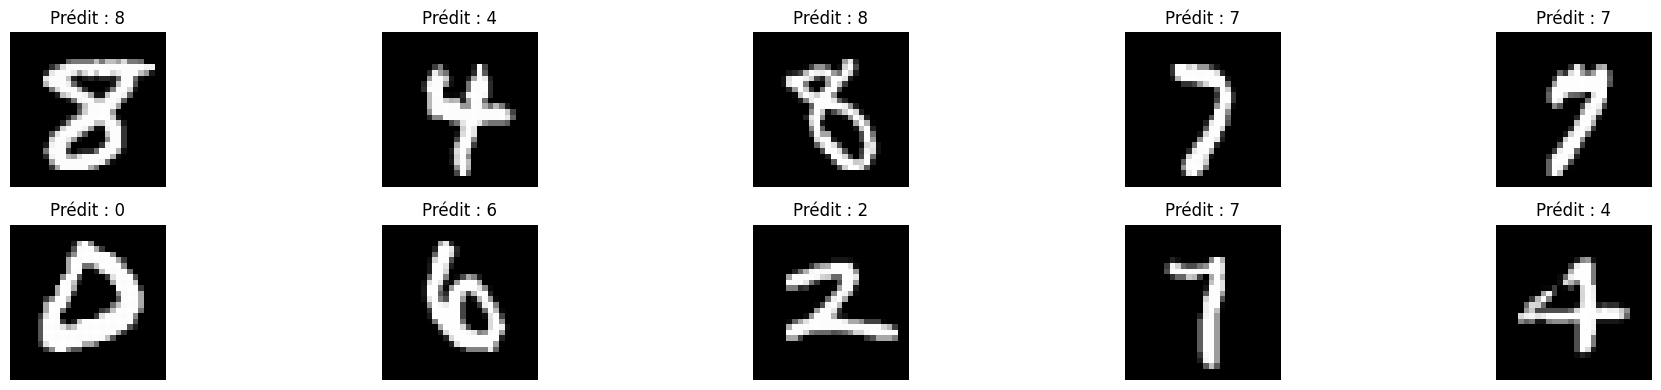

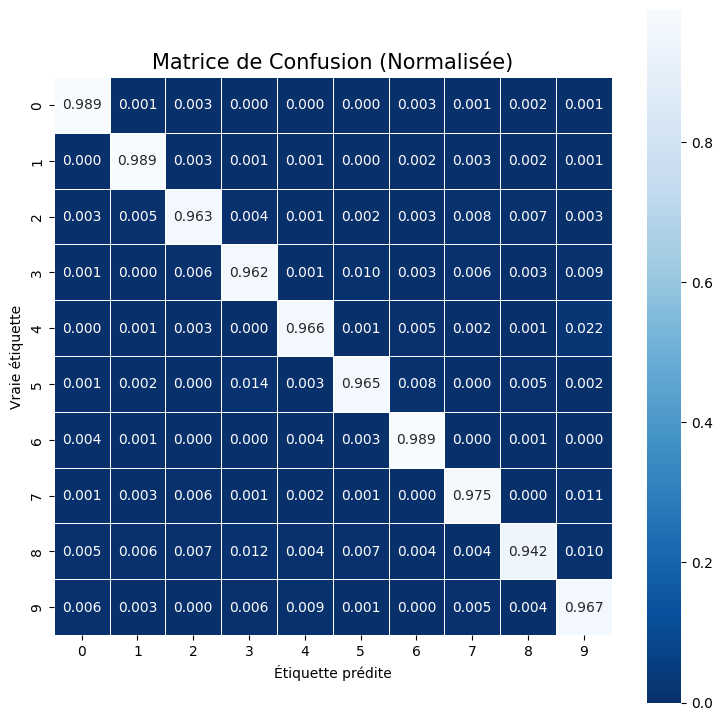


Précision du modèle sur l'ensemble de test : 97.09%


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 1. Charger et préparer le dataset MNIST (comme dans les étapes précédentes)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. (Rappel) Créer et entraîner le modèle (vous pouvez réutiliser le meilleur modèle trouvé à l'étape 4)
#    Ici, on utilise un modèle simple pour l'exemple. N'hésitez pas à encourager les étudiants
#    à utiliser les modèles qu'ils ont entraînés précédemment.
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
model.fit(X_train, y_train)

# 3. Obtenir les probabilités prédites pour l'ensemble de test
#    Pour chaque image de test, le modèle donne une probabilité d'appartenance à chaque classe (chiffre de 0 à 9).
y_test_probs = model.predict_proba(X_test)
print("Probabilités prédites pour la première image de test :\n", y_test_probs[0])

# 4. Convertir les probabilités en prédictions de classe
#    On choisit la classe avec la probabilité la plus élevée comme prédiction.
y_test_pred = np.argmax(y_test_probs, axis=1)
print("\nClasses prédites (les 20 premières) :", y_test_pred[:20])
print("Classes réelles     (les 20 premières) :", y_test[:20].values[:20]) # Accès aux valeurs NumPy

# 5. Visualiser les prédictions sur les 10 premières images de test
plt.figure(figsize=(20, 4))
for index in range(10):
    plt.subplot(2, 5, index + 1)
    # Remodeler l'image aplatie en une image 28x28 pour l'affichage
    plt.imshow(X_test.iloc[index].values.reshape(28, 28), cmap=plt.cm.gray) # Accès aux valeurs NumPy
    plt.title(f"Prédit : {y_test_pred[index]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 6. Matrice de Confusion
#    Affiche le nombre de fois où chaque chiffre a été confondu avec un autre.
#    La normalisation permet de voir les proportions.
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de Confusion (Normalisée)', size=15)
plt.show()

# 7. Afficher la précision globale (pour comparer avec les visualisations)
accuracy = np.mean(y_test_pred == y_test)
print(f"\nPrécision du modèle sur l'ensemble de test : {accuracy * 100:.2f}%")

# 1. Prédictions sur les images de test  

## Le modèle a-t-il correctement prédit les chiffres ? Y a-t-il des erreurs ?  

En analysant les **10 premières images de test**, la plupart des prédictions du modèle semblent **correctes**. Cependant, il est possible de relever des **erreurs** lorsque les chiffres sont **mal écrits, flous ou ambigus**.  

### Pourquoi le modèle pourrait-il se tromper ?  
Les erreurs peuvent être dues à plusieurs facteurs, notamment :  

- **Une écriture peu lisible ou inhabituelle**, qui rend la distinction entre certaines classes difficile.  
- **Une ressemblance visuelle entre certains chiffres**, par exemple :  
  - Un **"4" mal écrit** pouvant être interprété comme un **"9"**.  
  - Un **"8" et un "3"** qui partagent des **caractéristiques similaires**.  
  - Un **"7" et un "1"** qui peuvent être confondus selon le **style d’écriture**.  


# 2. Analyse de la matrice de confusion  

## Que représentent les lignes et les colonnes ?  
- **Les lignes** correspondent aux **vraies étiquettes** (les chiffres réels).  
- **Les colonnes** correspondent aux **prédictions du modèle** (les chiffres que le modèle a identifiés).  

## Les valeurs élevées sont-elles principalement sur la diagonale ?  
Oui, la **diagonale contient les valeurs les plus élevées**, ce qui signifie que le modèle a **correctement classifié la majorité des chiffres**.  

## Y a-t-il des erreurs en dehors de la diagonale ? Quels types d'erreurs sont les plus fréquents ?  
On observe **quelques erreurs hors de la diagonale**, ce qui indique que certains chiffres ont été **mal classifiés**.  

### Parmi les confusions les plus probables :  
- **Confusion entre "4" et "9"**, ce qui peut être expliqué par **des similarités dans certaines écritures**.  
- **Confusion entre "8" et "3"**, car ces chiffres ont **une structure visuellement proche**.  
- **Confusion entre "7" et "1"**, en raison d’**écritures simplifiées** qui peuvent prêter à confusion.  

Ces erreurs sont visibles dans la **matrice de confusion** par des **valeurs plus élevées hors de la diagonale principale**.  

# Résumé 

Le code implémente un **réseau de neurones MLP** pour classifier les chiffres manuscrits du dataset **MNIST**.  

- Il commence par **charger et normaliser les données**, puis les divise en **train (80%) et test (20%)**.  
- Un **MLPClassifier** avec **100 neurones cachés** est entraîné sur l’ensemble d’apprentissage.  
- Ensuite, le modèle **prédit les classes** des images de test et affiche les **10 premières prédictions** avec les images correspondantes.  
- Une **matrice de confusion** est générée pour analyser les erreurs de classification.  
- Enfin, la **précision globale** du modèle est calculée, montrant ses performances.  
- Des erreurs subsistent, notamment sur des chiffres visuellement proches (ex. "4" et "9").  
- Pour améliorer le modèle, il serait pertinent d’**ajuster la structure du réseau ou d’augmenter max_iter**.  


# Conclusion

Les résultats montrent que l'architecture du réseau, l'optimisation et la régularisation influencent la précision du modèle.
L'ajout de plusieurs couches cachées améliore légèrement la classification, et l'optimiseur Adam offre de meilleures performances que SGD.
Pour améliorer encore le modèle, il serait pertinent d’augmenter max_iter, d’expérimenter avec d'autres architectures (ex. CNNs) et d'affiner la régularisation.
Ce projet permet de comprendre les principes fondamentaux du deep learning et d’appliquer ces concepts sur un problème réel de classification d’images.



